In [25]:
! pip install kaggle

^C


In [10]:
!pwd

/d/Coding Stuff/Machine Learning/Deep Learning Projects/Dog vs Cat classification


In [12]:
# configuring the path of Kaggle.json file
# !mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [15]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats


  0%|          | 0.00/812M [00:00<?, ?B/s]
  0%|          | 1.00M/812M [00:00<03:33, 3.99MB/s]
  0%|          | 2.00M/812M [00:00<02:20, 6.04MB/s]
  0%|          | 4.00M/812M [00:00<01:42, 8.26MB/s]
  1%|          | 6.00M/812M [00:00<02:02, 6.88MB/s]
  1%|          | 7.00M/812M [00:01<01:55, 7.31MB/s]
  1%|          | 8.00M/812M [00:01<01:54, 7.34MB/s]
  1%|          | 9.00M/812M [00:01<01:51, 7.57MB/s]
  1%|▏         | 11.0M/812M [00:01<01:33, 8.95MB/s]
  1%|▏         | 12.0M/812M [00:01<01:39, 8.42MB/s]
  2%|▏         | 13.0M/812M [00:01<01:35, 8.77MB/s]
  2%|▏         | 15.0M/812M [00:01<01:30, 9.24MB/s]
  2%|▏         | 16.0M/812M [00:02<01:43, 8.08MB/s]
  2%|▏         | 17.0M/812M [00:02<01:56, 7.13MB/s]
  2%|▏         | 18.0M/812M [00:02<03:01, 4.59MB/s]
  2%|▏         | 19.0M/812M [00:03<02:55, 4.74MB/s]
  2%|▏         | 20.0M/812M [00:03<02:39, 5.20MB/s]
  3%|▎         | 21.0M/812M [00:03<02:33, 5.40MB/s]
  3%|▎         | 22.0M/812M [00:03<02:33, 5.41MB/s]
  3%|▎         | 23.


 26%|██▌       | 210M/812M [00:51<01:49, 5.76MB/s]
 26%|██▌       | 211M/812M [00:52<04:00, 2.62MB/s]
 26%|██▌       | 212M/812M [00:53<04:36, 2.27MB/s]
 26%|██▌       | 213M/812M [00:53<03:55, 2.66MB/s]
 26%|██▋       | 214M/812M [00:53<03:21, 3.12MB/s]
 26%|██▋       | 215M/812M [00:53<02:46, 3.75MB/s]
 27%|██▋       | 216M/812M [00:53<02:27, 4.24MB/s]
 27%|██▋       | 217M/812M [00:53<02:17, 4.53MB/s]
 27%|██▋       | 218M/812M [00:54<02:25, 4.28MB/s]
 27%|██▋       | 219M/812M [00:55<04:35, 2.26MB/s]
 27%|██▋       | 220M/812M [00:57<08:37, 1.20MB/s]
 27%|██▋       | 221M/812M [00:57<08:02, 1.29MB/s]
 27%|██▋       | 222M/812M [00:58<06:31, 1.58MB/s]
 27%|██▋       | 223M/812M [00:58<05:05, 2.02MB/s]
 28%|██▊       | 224M/812M [00:58<03:57, 2.60MB/s]
 28%|██▊       | 225M/812M [00:58<03:11, 3.21MB/s]
 28%|██▊       | 226M/812M [00:58<02:39, 3.86MB/s]
 28%|██▊       | 227M/812M [00:58<02:17, 4.47MB/s]
 28%|██▊       | 228M/812M [00:58<02:00, 5.10MB/s]
 28%|██▊       | 229M/812M [00

In [ ]:
# extracting the files
from zipfile import ZipFile
dataset = 'dogs-vs-cats.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('done')

In [18]:
train_data = 'train.zip'
with ZipFile(train_data,'r') as zip:
    zip.extractall()

In [24]:
import os
dir ='./train'
print(len(os.listdir(dir)))

25000


In [27]:
# counting the number of dog and cat images
print(f'The total number of images : {len(os.listdir(dir))}')
files = os.listdir(dir)
dog_counter = 0
cat_counter = 0
for i in files:
    if i.startswith('dog'):
        dog_counter+=1
    else:
        cat_counter+=1
print(f'The total no. of Dog images :{dog_counter}')
print(f'The total no. of cat images :{cat_counter}')

The total number of images : 25000
The total no. of Dog images :12500
The total no. of cat images :12500


In [32]:
file_names = os.listdir('./train/')

for i in range(5):
  
  name = file_names[i] 
  print(name)
  print(name[0:3])


cat.0.jpg
cat
cat.1.jpg
cat
cat.10.jpg
cat
cat.100.jpg
cat
cat.1000.jpg
cat


Importing dependencies

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import random 

Resizing 5000 images and making their labels

In [49]:
os.mkdir('./resized_images')

In [58]:
original_dir = './train/'
resized_image_dir = './resized_images/'
files = os.listdir(original_dir)

for i in range(5500):
    file = random.choice(files)
    # resizing the images
    img = Image.open(original_dir + file)
    img = img.resize((224,224))
    img = img.convert('RGB')
    new_path = resized_image_dir+file
    img.save(new_path)  

In [2]:
# Creating the labels of the images
resized_image_dir = './resized_images/'
files = os.listdir(resized_image_dir)
labels =[1 if file[0:3]=='dog' else 0 for file in files ]



label :- 0
This is a Cat


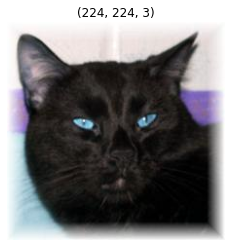

In [3]:
file = random.choice(os.listdir('./resized_images/'))
path = os.path.join(resized_image_dir,file)
img = cv2.imread(path)
plt.title(img.shape)
img= plt.imshow(img)
plt.axis('off')

for i, j in enumerate(files):
    if j==file:
        label = labels[i]
        print()
        print(f'label :- {label}')
        if label == 0:
            print("This is a Cat")
        else:
            print("This is a Dog")
        break
    

In [4]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[2469 2435]


In [5]:
import glob

In [6]:
image_dir = './resized_images/'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_dir + '*.' + e )) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [7]:
type(dog_cat_images)

numpy.ndarray

In [8]:
print(dog_cat_images.shape)

(4904, 224, 224, 3)


In [9]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.15, random_state=2)

In [11]:
print(X.shape, Xtrain.shape, Xtest.shape)

(4904, 224, 224, 3) (4168, 224, 224, 3) (736, 224, 224, 3)


4168 ---> training

736 ---> testing

In [12]:
# scaling the data
Xtrain_scaled = Xtrain/255.
Xtest_scaled = Xtest/255.

**Building the Neural Network**

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

In [14]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [15]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [17]:
model.fit(Xtrain_scaled,Ytrain, epochs=5)

Epoch 1/5
131/131 [==============================] - 88s 597ms/step - loss: 0.1417 - accuracy: 0.9429
Epoch 2/5
131/131 [==============================] - 76s 577ms/step - loss: 0.0565 - accuracy: 0.9818
Epoch 3/5
131/131 [==============================] - 75s 573ms/step - loss: 0.0450 - accuracy: 0.9854
Epoch 4/5
131/131 [==============================] - 76s 577ms/step - loss: 0.0366 - accuracy: 0.9887
Epoch 5/5
131/131 [==============================] - 75s 569ms/step - loss: 0.0315 - accuracy: 0.9918


In [18]:
loss, acc = model.evaluate(Xtest_scaled, Ytest)
print(f'The Loss :- {loss}')
print(f'The Accuracy :- {acc*100}')

23/23 [==============================] - 16s 630ms/step - loss: 0.0750 - accuracy: 0.9783
The Loss :- 0.07495120167732239
The Accuracy :- 97.826087474823


**Predictive System**

1/1 [==============================] - 0s 93ms/step
[[ 1.8983469 -5.1709633]]
The image represents a Cat


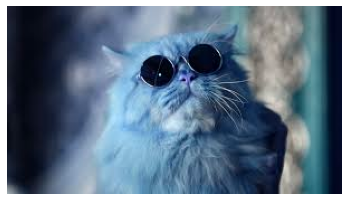

In [31]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
plt.axis('off')
plt.imshow(input_image)

resized_image = cv2.resize(input_image, (224,224))

scaled_image = resized_image/255

reshaped_image = scaled_image[np.newaxis,...]
input_prediction = model.predict(reshaped_image)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')